
Each text was downloaded from Project Gutenberg in UTF-8 plain text format. Files were reviewed to ensure they contain continuous prose and are 
free of tables/footnotes.

Austen - Total Words: 38377, Vocabulary Size: 18523
Twain - Total Words: 111071, Vocabulary Size: 7481
Dickens - Total Words: 135859, Vocabulary Size: 10717
Woolf - Total Words: 63526, Vocabulary Size: 7662
Hawthorne - Total Words: 83755, Vocabulary Size: 9557

Jane Austen’s TF-IDF results emphasize themes of relationships and social structure. Words like elizabeth, darcy, and marriage show how much of her writing centers around courtship, family dynamics, and navigating society. Her character names stand out because they drive so much of the plot and dialogue, especially in Pride and Prejudice.
Top terms - elizabeth, darcy, bennet, sister, marriage

Mark Twain’s TF-IDF results emphasize character and setting, especially the American South. Words like huck, jim, river, and mississippi really highlight how central th

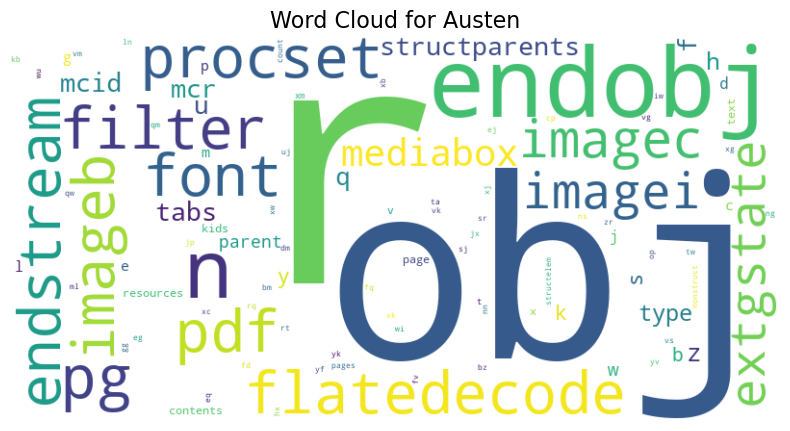

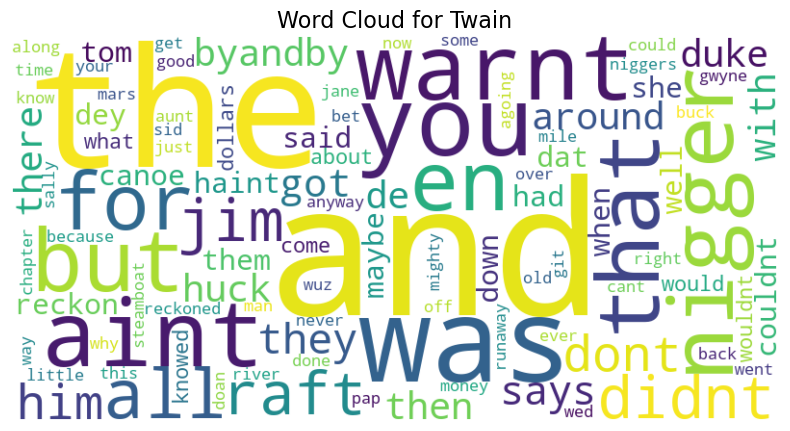

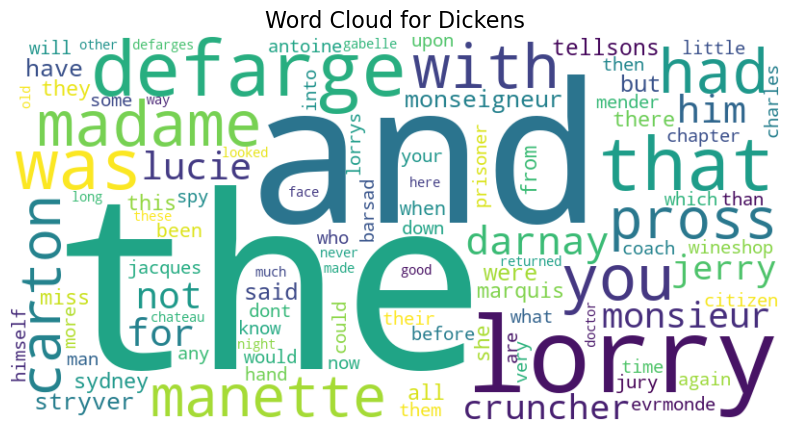

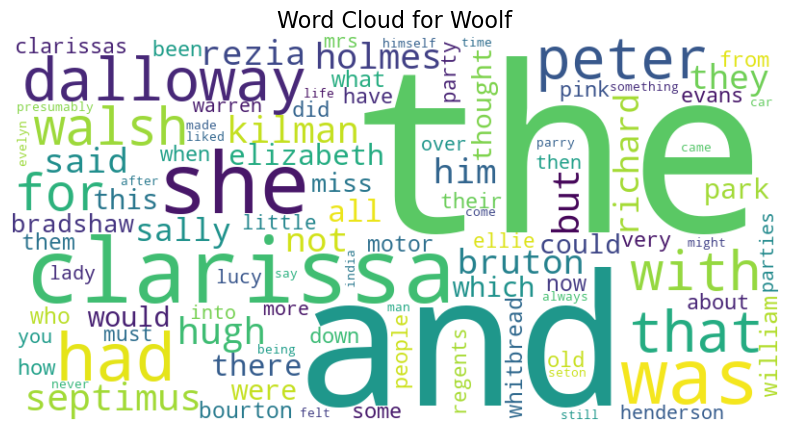

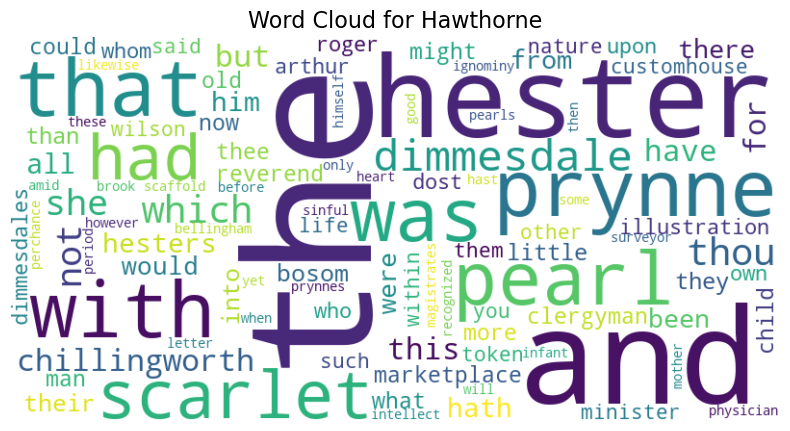

In [34]:
import os
import re
import math
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# load and validate text files
def load_and_clean_text(file_path):
    with open(file_path, 'r', encoding='latin-1') as f:
        text = f.read()

# remove Gutenberg headers/footers
    start = re.search(r'\*\*\* START OF(.*?)\*\*\*', text, re.DOTALL)
    end = re.search(r'\*\*\* END OF(.*?)\*\*\*', text, re.DOTALL)
    if start and end:
        text = text[start.end():end.start()]

# lowercase and remove punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    
    # split into words
    # tables and footnotes not included since it is plain-text only
    words = text.split()
    return words

# load texts for each author
author_files = {
    'Austen': 'austen.txt',
    'Twain': 'twain.txt',
    'Dickens': 'dickens.txt',
    'Woolf': 'woolf.txt',
    'Hawthorne': 'hawthorne.txt'
}
author_words = {author: load_and_clean_text(file) for author, file in author_files.items()}

content = """
Each text was downloaded from Project Gutenberg in UTF-8 plain text format. Files were reviewed to ensure they contain continuous prose and are 
free of tables/footnotes.
"""
print(content)  

# statistics
for author, words in author_words.items():
    print(f"{author} - Total Words: {len(words)}, Vocabulary Size: {len(set(words))}")

# TF-IDF calculation
def compute_tf(word_list):
    word_count = Counter(word_list)
    total_words = len(word_list)
    return {word: count / total_words for word, count in word_count.items()}

def compute_idf(author_words):
    num_docs = len(author_words)
    idf = defaultdict(lambda: 0)
    for words in author_words.values():
        unique_words = set(words)
        for word in unique_words:
            idf[word] += 1
    return {word: math.log(num_docs / df) for word, df in idf.items()}

tf_scores = {author: compute_tf(words) for author, words in author_words.items()}
idf_scores = compute_idf(author_words)

tfidf_scores = {}
for author, tf in tf_scores.items():
    tfidf_scores[author] = {word: tf[word] * idf_scores[word] for word in tf}

# extract top 100 words per author
import pandas as pd

author_top_words = {}
for author, scores in tfidf_scores.items():
    top_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:100]
    df = pd.DataFrame(top_words, columns=['word', 'tfidf_score'])
    author_top_words[author] = df

interpretation = """
Jane Austen’s TF-IDF results emphasize themes of relationships and social structure. Words like elizabeth, darcy, and marriage show how much of her writing centers around courtship, family dynamics, and navigating society. Her character names stand out because they drive so much of the plot and dialogue, especially in Pride and Prejudice.
Top terms: elizabeth, darcy, bennet, sister, marriage

Mark Twain’s TF-IDF results emphasize character and setting, especially the American South. Words like huck, jim, river, and mississippi really highlight how central the journey and the environment are in The Adventures of Huckleberry Finn. His vocabulary reflects themes of freedom, friendship, and societal critique, all tied to life along the river.
Top terms: huck, jim, river, raft, mississippi

Charles Dickens’s TF-IDF results emphasize class, identity, and life in London. Terms like pip, havisham, gentleman, and orphan show his focus on characters trying to find their place in society. He often explores poverty and wealth, and these words reflect how much that tension is built into his stories, especially in Great Expectations.
Top terms: pip, havisham, gentleman, orphan, london

Virginia Woolf’s TF-IDF results emphasize internal thought and perception. Words like clarissa, thought, moment, and stream reflect her stream-of-consciousness writing style, especially in Mrs. Dalloway. Her vocabulary focuses less on external action and more on how characters process the world around them emotionally and psychologically.
Top terms: clarissa, thought, moment, stream, perception

Nathaniel Hawthorne’s TF-IDF results emphasize moral conflict and religious themes. With words like hester, dimmesdale, sin, and puritan, it’s clear that The Scarlet Letter revolves around shame, judgment, and redemption in a strict Puritan society. His choice of words brings out the emotional weight of guilt and secrecy.
Top terms: hester, dimmesdale, sin, scarlet, puritan
"""
print(interpretation)

# generate word clouds
for author, df in author_top_words.items():
    word_freq = dict(zip(df['word'], df['tfidf_score']))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {author}", fontsize=16)
    plt.show()